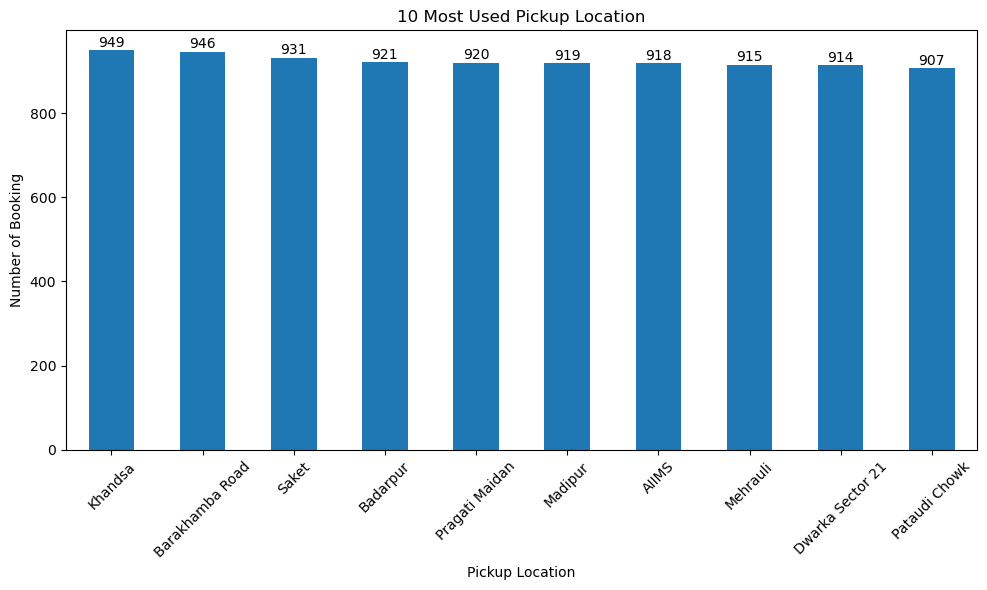

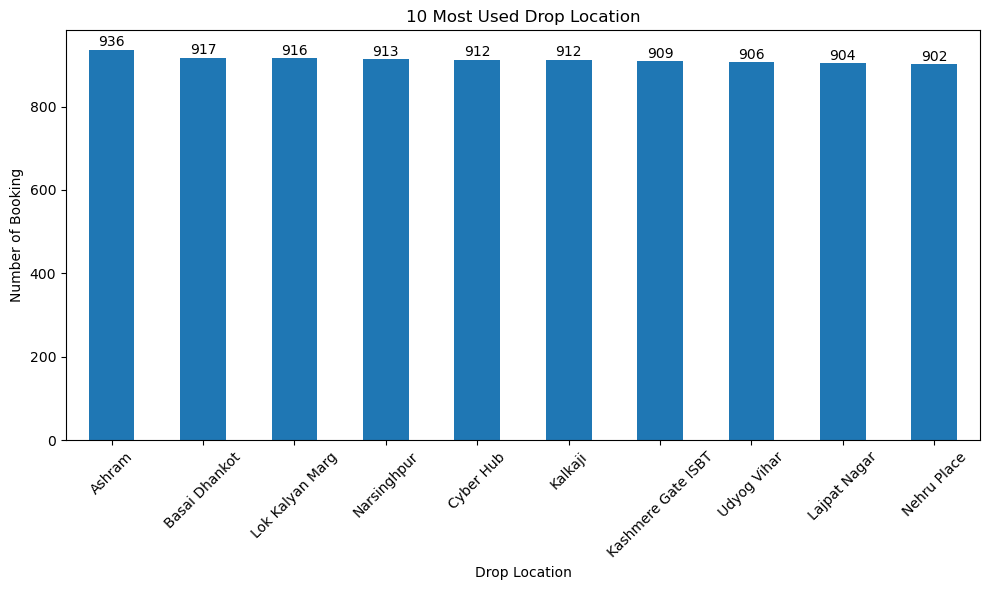

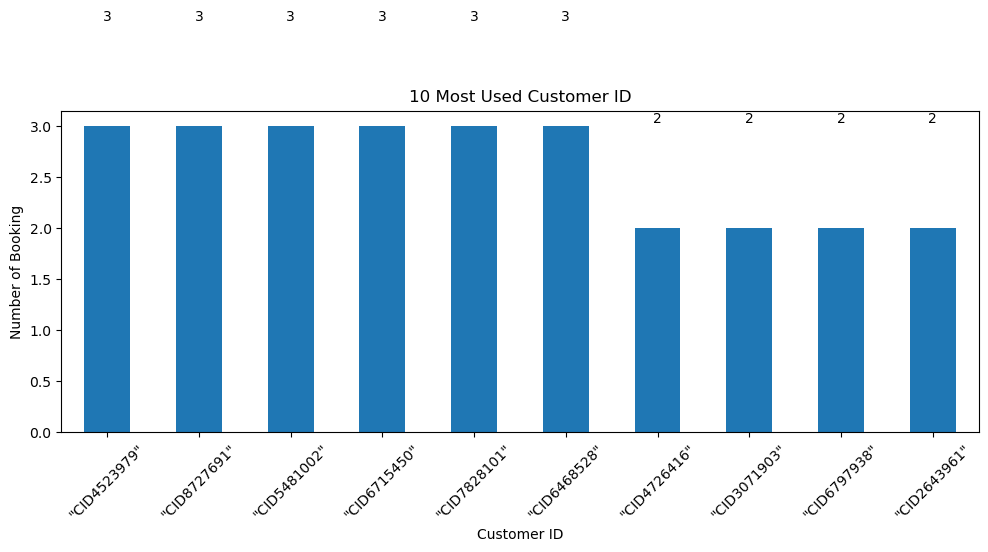

In [9]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Bar Chart 10 Most Context
target_col = ['Pickup Location','Drop Location','Customer ID']

for dt in target_col:
    df = pd.read_csv("ncr_ride_bookings.csv")
    
    # Dataset
    top_context = df[dt].value_counts().head(10)
        
    # Bar Chart
    plt.figure(figsize=(10, 6))
    ax = top_context.plot(kind='bar')
    # Add label
    for i, value in enumerate(top_context):
        plt.text(i, value + 1, str(value), ha='center', va='bottom')
    plt.title(f"10 Most Used {dt}")
    plt.xlabel(dt)
    plt.ylabel("Number of Booking")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

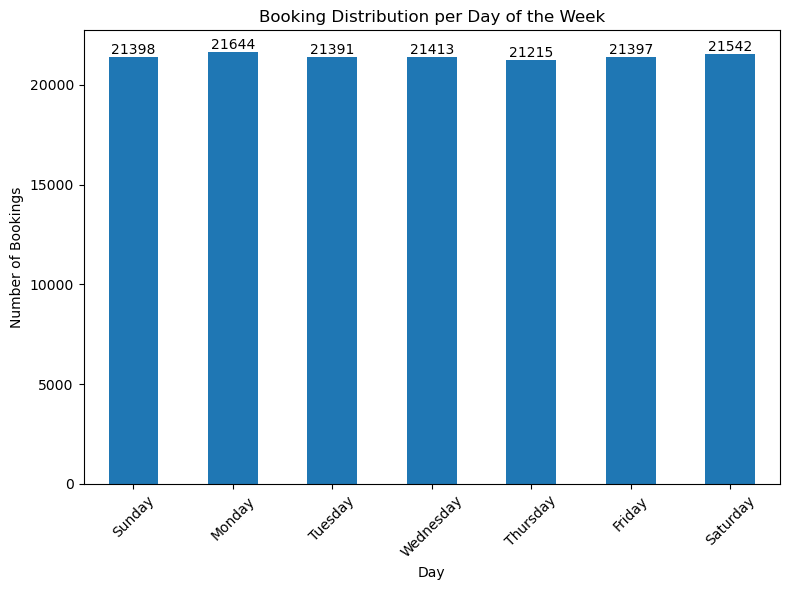

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Bar Chart Booking per Day
df = pd.read_csv("ncr_ride_bookings.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Extract day name
df["Day Name"] = df["Date"].dt.day_name()

# Define order of day
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Count bookings per day and reorder
day_name_counts = df["Day Name"].value_counts().reindex(order)

# Bar Chart
plt.figure(figsize=(8, 6))
day_name_counts.plot.bar()
# Add label
for i, value in enumerate(day_name_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Booking Distribution per Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

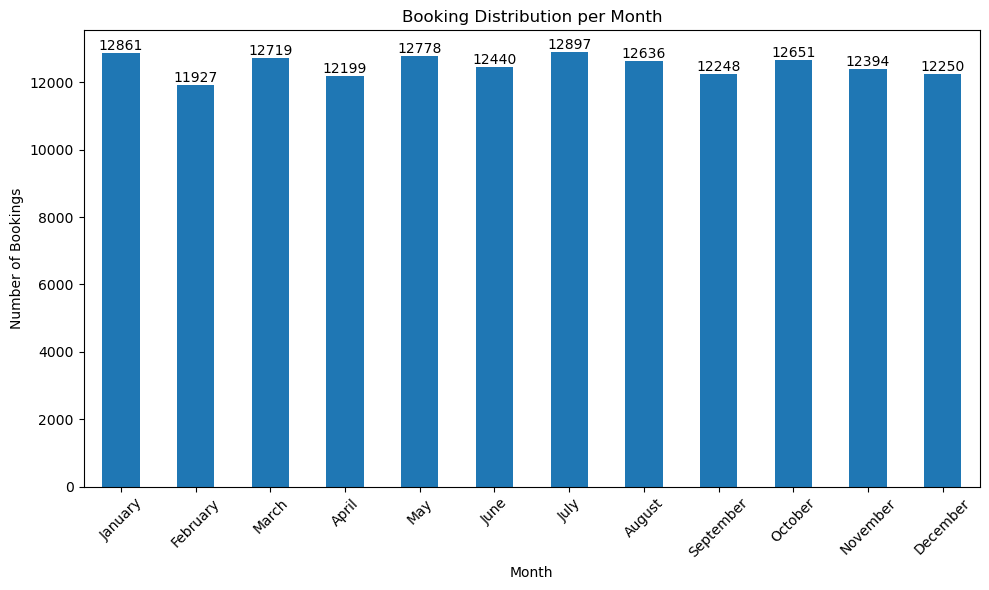

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Bar Chart Booking per Month
df = pd.read_csv("ncr_ride_bookings.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Extract month name
df["Month Name"] = df["Date"].dt.month_name()

# Define order of months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Count bookings per month and reorder
month_counts = df["Month Name"].value_counts().reindex(month_order)

# Bar Chart
plt.figure(figsize=(10, 6))
month_counts.plot.bar()
# Add label
for i, value in enumerate(month_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Booking Distribution per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

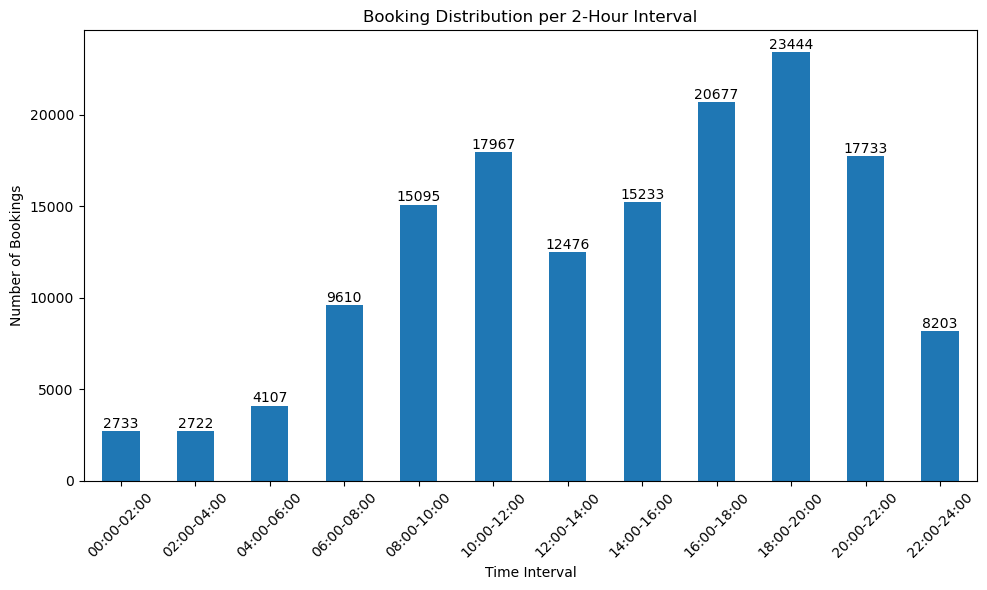

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Bar Chart Booking per 2-Hour Interval
df = pd.read_csv("ncr_ride_bookings.csv")

# Convert Time column to datetime
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S")

# Extract hour
df["Hour"] = df["Time"].dt.hour

# Define 2-hour bins and labels
bins = list(range(0, 25, 2))
labels = [f"{str(h).zfill(2)}:00-{str(h+2).zfill(2)}:00" for h in bins[:-1]]

# Group between 2-hour intervals
df["Time Group"] = pd.cut(df["Hour"], bins=bins, labels=labels, right=False)

# Count and order bookings per interval
time_counts = df["Time Group"].value_counts().sort_index()

# Bar Chart
plt.figure(figsize=(10, 6))
time_counts.plot.bar()
# Add label
for i, value in enumerate(time_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Booking Distribution per 2-Hour Interval")
plt.xlabel("Time Interval")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

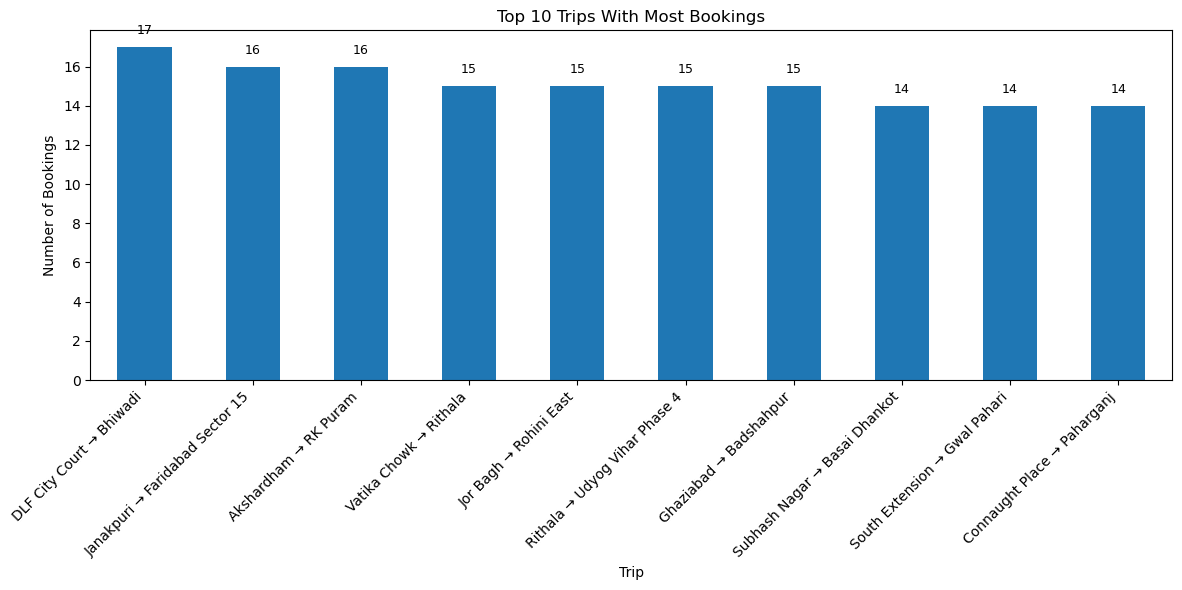

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Bar Chart 10 Trip With Most Booking
df = pd.read_csv("ncr_ride_bookings.csv")

# Count and order bookings
df["Trip"] = df['Pickup Location'] + " → " + df['Drop Location']

# Count bookings
trip_counts = df["Trip"].value_counts().head(10)

# Bar Chart
plt.figure(figsize=(12, 6))
trip_counts.plot.bar()
# Add labels
for i, value in enumerate(trip_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)
plt.title("Top 10 Trips With Most Bookings")
plt.xlabel("Trip")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

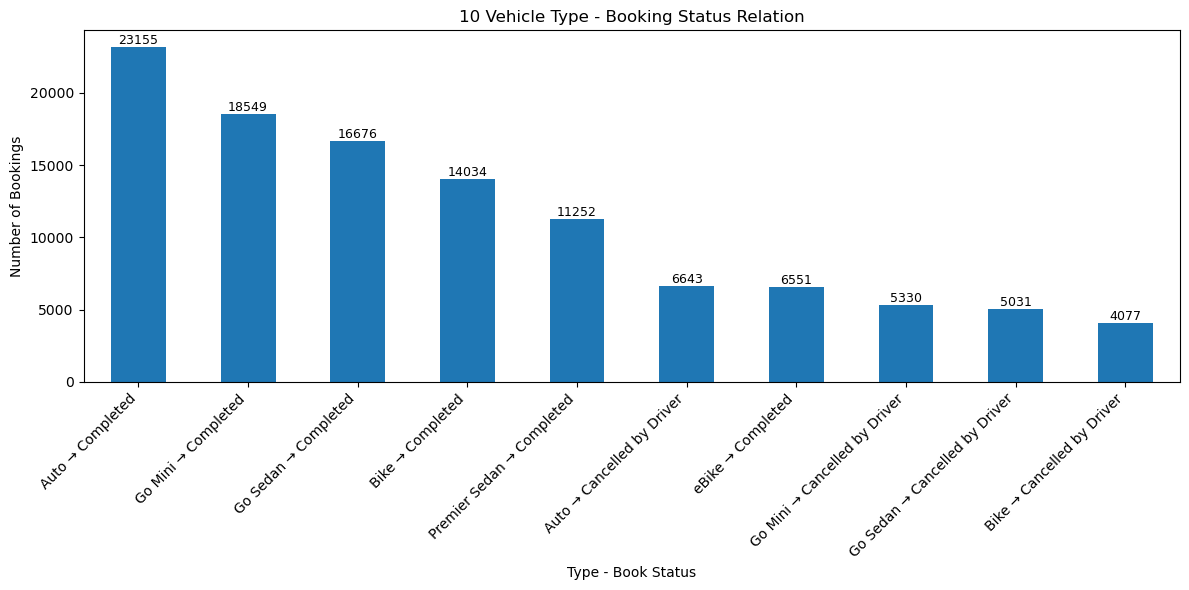

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Bar Chart 10 Vehicle Type - Booking Status Relation
df = pd.read_csv("ncr_ride_bookings.csv")

# Count and order bookings
df["Type - Book Status"] = df['Vehicle Type'] + " → " + df['Booking Status']

# Count bookings
trip_counts = df["Type - Book Status"].value_counts().head(10)

# Bar Chart
plt.figure(figsize=(12, 6))
trip_counts.plot.bar()
# Add labels
for i, value in enumerate(trip_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)
plt.title("10 Vehicle Type - Booking Status Relation")
plt.xlabel("Type - Book Status")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

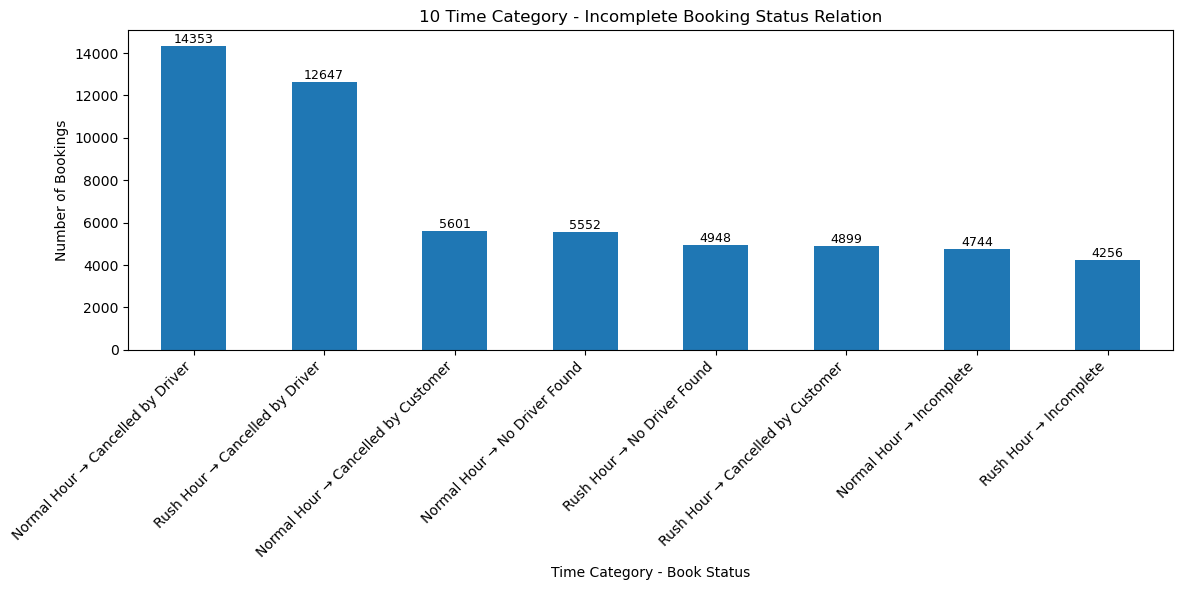

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Bar Chart 10 Time Category - Incomplete Booking Status Relation
df = pd.read_csv("ncr_ride_bookings.csv")

# Convert Time to datetime
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour

# Convert Hour to Time Category
def categorize_time(hour):
    if (6 <= hour < 9) or (16 <= hour < 21):
        return "Rush Hour"
    else:
        return "Normal Hour"

df["Time Category"] = df["Hour"].apply(categorize_time)

# Remove Completed Booking
df = df[df["Booking Status"] != "Completed"]
        
# Count and order bookings
df["Time Category - Book Status"] = df['Time Category'] + " → " + df['Booking Status']

# Count bookings
trip_counts = df["Time Category - Book Status"].value_counts().head(10)

# Bar Chart
plt.figure(figsize=(12, 6))
trip_counts.plot.bar()
# Add labels
for i, value in enumerate(trip_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)
plt.title("10 Time Category - Incomplete Booking Status Relation")
plt.xlabel("Time Category - Book Status")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()